<a href="https://colab.research.google.com/github/Abdul-Ahad153/Paris-Olympics-Medal-tally-analysis/blob/main/Paris_2024_Olympics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
berkayalan_paris_2024_olympics_medals_path = kagglehub.dataset_download('berkayalan/paris-2024-olympics-medals')

print('Data source import complete.')


# olympics2024

### libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("/kaggle/input/paris-2024-olympics-medals/olympics2024.csv", encoding = 'unicode_escape')

In [ ]:
data

,Rank,Country,Country Code,Gold,Silver,Bronze,Total
0,1,United States,US,40,44,42,126
1,2,China,CHN,40,27,24,91
2,3,Japan,JPN,20,12,13,45
3,4,Australia,AUS,18,19,16,53
4,5,France,FRA,16,26,22,64
...,...,...,...,...,...,...,...
86,84,Peru,PER,0,0,1,1
87,84,Qatar,QAT,0,0,1,1
88,84,Singapore,SIN,0,0,1,1
89,84,Slovakia,SVK,0,0,1,1


In [ ]:
pd.DataFrame({'count': data.shape[0],
              'nulls': data.isnull().sum(),
              'nulls%': data.isnull().mean() * 100,
              'cardinality': data.nunique(),
             })

,count,nulls,nulls%,cardinality
Rank,91,0,0.0,63
Country,91,0,0.0,91
Country Code,91,0,0.0,91
Gold,91,0,0.0,18
Silver,91,0,0.0,16
Bronze,91,0,0.0,19
Total,91,0,0.0,27


In [ ]:
data.describe()

,Rank,Gold,Silver,Bronze,Total
count,91.000000,91.000000,91.000000,91.000000,91.000000
mean,45.307692,3.604396,3.593407,4.219780,11.417582
std,25.652244,6.990278,6.770816,6.558798,19.702829
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,23.500000,0.000000,0.000000,1.000000,2.000000
50%,44.000000,1.000000,1.000000,2.000000,5.000000
75%,68.000000,3.000000,3.000000,5.000000,9.000000
max,84.000000,40.000000,44.000000,42.000000,126.000000


In [ ]:
data.Rank.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35,
       36, 37, 39, 41, 42, 43, 44, 47, 48, 49, 50, 51, 52, 55, 59, 60, 62,
       64, 65, 66, 68, 70, 71, 72, 73, 74, 79, 80, 84])

In [ ]:
len(data.Rank.unique())

63

In [ ]:
data.Country.unique()[:10]

array(['United States', 'China', 'Japan', 'Australia', 'France',
       'Netherlands', 'Great Britain', 'South Korea', 'Italy', 'Germany'],
      dtype=object)

In [ ]:
len(data.Country.unique())

91

In [ ]:
data.Gold.unique()

array([40, 20, 18, 16, 15, 14, 13, 12, 10,  9,  8,  6,  5,  4,  3,  2,  1,
        0])

In [ ]:
data.Silver.unique()

array([44, 27, 12, 19, 26,  7, 22,  9, 13,  2,  4,  1,  0,  6,  5,  3])

In [ ]:
data.Bronze.unique()

array([42, 24, 13, 16, 22, 12, 29, 10, 15,  8,  3, 11,  6,  9,  5,  4,  2,
        1,  0])

In [ ]:
data.groupby(['Country']).agg({
    'Gold': 'sum'
}).sort_values(by = 'Gold', ascending=False)[:15]

,Gold
Country,
China,40
United States,40
Japan,20
Australia,18
France,16
Netherlands,15
Great Britain,14
South Korea,13
Germany,12


In [ ]:
data.groupby(['Country']).agg({
    'Silver': 'sum'
}).sort_values(by = 'Silver', ascending=False)[:15]

,Silver
Country,
United States,44
China,27
France,26
Great Britain,22
Australia,19
Germany,13
Italy,13
Japan,12
South Korea,9


In [ ]:
data.groupby(['Country']).agg({
    'Bronze': 'sum'
}).sort_values(by = 'Bronze', ascending=False)[:15]

,Bronze
Country,
United States,42
Great Britain,29
China,24
France,22
Australia,16
Italy,15
Japan,13
Netherlands,12
Canada,11


In [ ]:
data.groupby(['Country']).agg({
    'Total': 'sum'
}).sort_values(by = 'Total', ascending=False)[:20]

,Total
Country,
United States,126
China,91
Great Britain,65
France,64
Australia,53
Japan,45
Italy,40
Netherlands,34
Germany,33


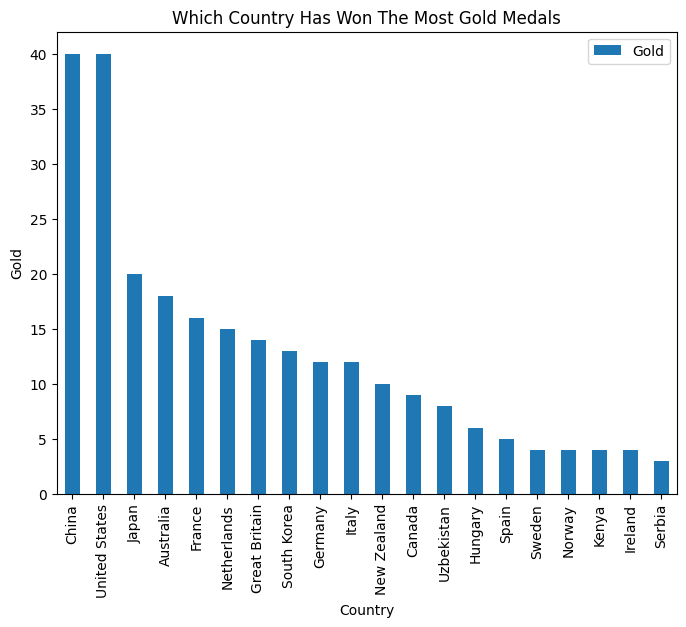

In [ ]:
Gold = data.groupby(['Country']).agg({
    'Gold': 'sum'
}).sort_values(by = 'Gold', ascending=False)[:20]

Gold.plot(kind='bar',figsize = (8,6))
plt.title('Which Country Has Won The Most Gold Medals')
plt.xlabel('Country')
plt.ylabel('Gold')

plt.show()

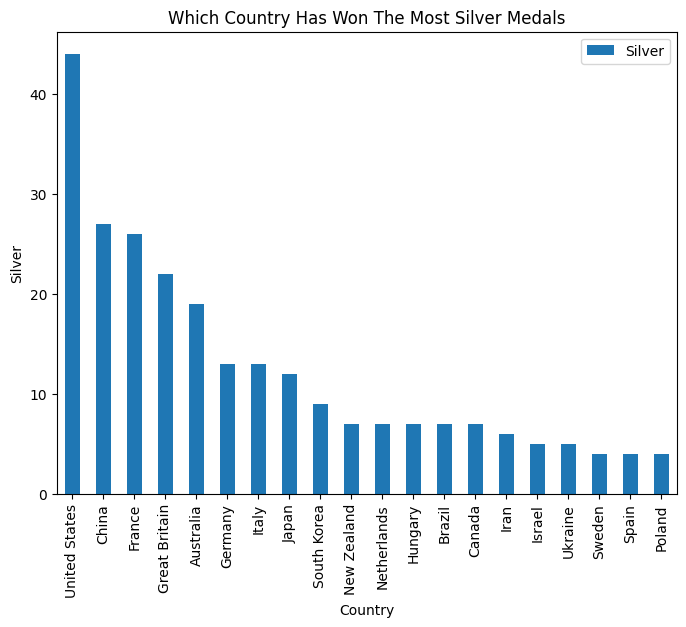

In [ ]:
Silver = data.groupby(['Country']).agg({
    'Silver': 'sum'
}).sort_values(by = 'Silver', ascending=False)[:20]

Silver.plot(kind='bar',figsize = (8,6))
plt.title('Which Country Has Won The Most Silver Medals')
plt.xlabel('Country')
plt.ylabel('Silver')

plt.show()

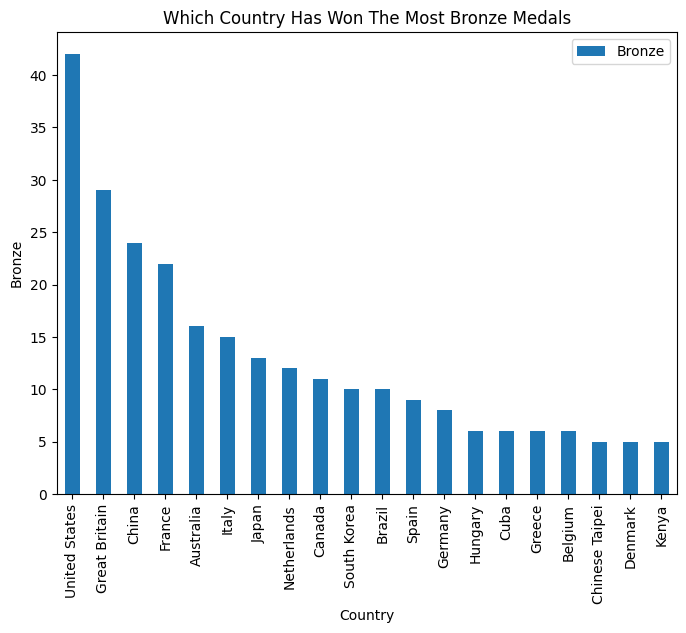

In [ ]:
Bronze = data.groupby(['Country']).agg({
    'Bronze': 'sum'
}).sort_values(by = 'Bronze', ascending=False)[:20]

Bronze.plot(kind='bar', figsize = (8,6))
plt.title('Which Country Has Won The Most Bronze Medals')
plt.xlabel('Country')
plt.ylabel('Bronze')

plt.show()

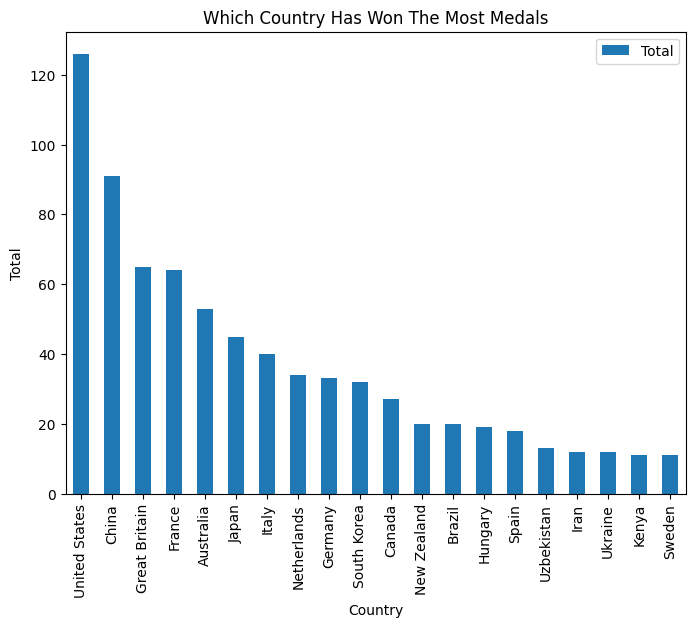

In [ ]:
Total = data.groupby(['Country']).agg({
    'Total': 'sum'
}).sort_values(by = 'Total', ascending=False)[:20]

Total.plot(kind='bar', figsize = (8,6))
plt.title('Which Country Has Won The Most Medals')
plt.xlabel('Country')
plt.ylabel('Total')

plt.show()

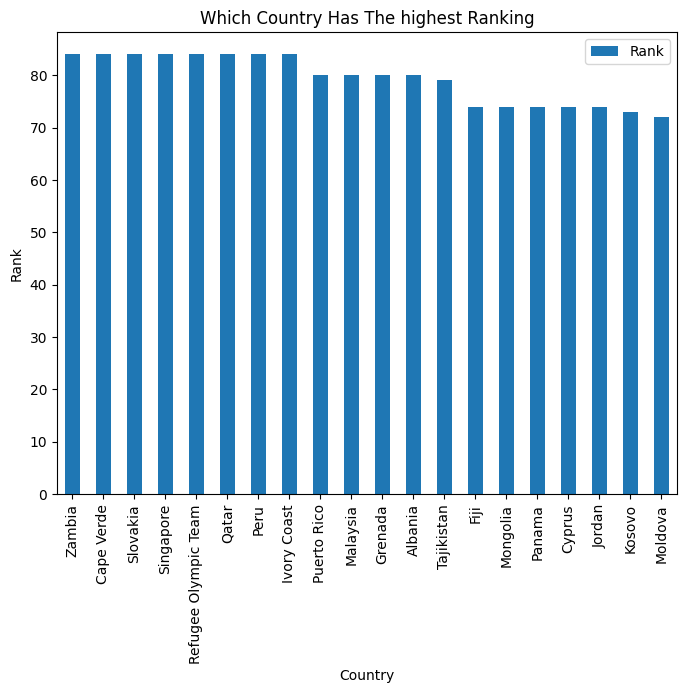

In [ ]:
Total = data.groupby(['Country']).agg({
    'Rank': 'sum'
}).sort_values(by = 'Rank', ascending=False)[:20]

Total.plot(kind='bar', figsize = (8,6))
plt.title('Which Country Has The highest Ranking')
plt.xlabel('Country')
plt.ylabel('Rank')

plt.show()

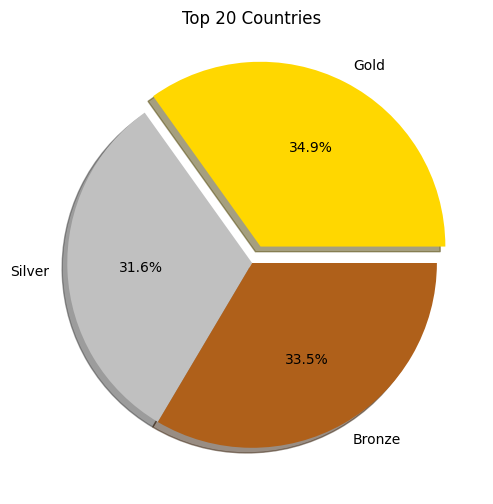

In [ ]:
medals = data.head(20)[['Gold', 'Silver', 'Bronze']].sum()

plt.figure(figsize=(6, 6))
plt.pie(medals, labels=medals.index, autopct='%1.1f%%', colors=['gold', 'silver', '#af601a'], shadow=True, explode=[0.1,0,0])
plt.title('Top 20 Countries')
plt.show()